In [1]:
from astrodbkit import astrodb
import matplotlib.pyplot as plt

In [2]:
db = astrodb.Database("bdnycdev1.db")

Database ready for use


In [3]:
db.info()


Database path: bdnycdev1.db 
SQL path: bdnycdev1.sql

Database Inventory
SOURCES: 1938
CHANGELOG: 205
DATA_REQUESTS: 27
IGNORE: 122
INSTRUMENTS: 54
MODES: 7
PARALLAXES: 436
PHOTOMETRY: 10358
PROPER_MOTIONS: 599
PUBLICATIONS: 607
RADIAL_VELOCITIES: 143
SPECTRA: 3614
SPECTRAL_TYPES: 1511
SYSTEMS: 15
TELESCOPES: 38
VERSIONS: 2


In [4]:
db.help()


The astrodb.Database class, hereafter db, provides a variety of methods to interact with a SQLite database file.
Docstrings are available for all methods and can be accessed in the usual manner; eg, help(db.query).
We list a few key methods below.

    Methods to explore the database:
    * db.query() - send SELECT commands to the database. Returns results in a variety of formats
    * db.info() - get a quick summary of the contents of the database
    * db.schema() - quickly examine the columns, types, etc of a specified table
    * db.search() - search through a table to find entries matching the criteria
    * db.inventory() - search for all entries that match the specified source_id
    * db.references() - search for all entries in all tables matching the criteria. Useful for publications

    Methods to modify the database:
    * db.add_data() - add data to an existing table, either by providing a file or by providing the data itself
    * db.table() - create or modify tables in 

In [5]:
help(db.query)

Help on method query in module astrodbkit.astrodb:

query(SQL, params='', fmt='array', fetch='all', unpack=False, export='', verbose=False, use_converters=True) method of astrodbkit.astrodb.Database instance
    Returns data satisfying the provided **SQL** script. Only SELECT or PRAGMA statements are allowed.
    Results can be returned in a variety of formats.
    For example, to extract the ra and dec of all entries in SOURCES in astropy.Table format one can write:
        data = db.query('SELECT ra, dec FROM sources', fmt='table')
    
    For more general SQL statements, see the modify() method.
    
    Parameters
    ----------
    SQL: str
        The SQL query to execute
    params: sequence
        Mimics the native parameter substitution of sqlite3
    fmt: str
        Returns the data as a dictionary, array, astropy.table, or pandas.Dataframe
        given 'dict', 'array', 'table', or 'pandas'
    fetch: str
        String indicating whether to return **all** results or just

In [6]:
db.query("SELECT * FROM TELESCOPES", fmt = "pandas")

,id,name,publication_shortname
0,1,SDSS,None
1,2,2MASS,None
2,3,WISE,None
3,4,UKIRT,None
4,5,HST,None
5,6,Spitzer,None
6,7,IRTF,None
7,8,Keck I,None
8,9,Keck II,None
9,10,KPNO 4m,None


In [7]:
db.query("SELECT * FROM SOURCES LIMIT 5", fmt = "pandas")

,comments,companions,components,dec,designation,id,names,publication_shortname,ra,shortname,unum,version
0,,None,None,18.333275,SDSS J16585026+1820006,1,SDSS J16585026+1820006,West08,254.709737,1658+1820,U51440,2.0
1,,None,None,-1.280556,2MASS J13314894-0116500,2,"SDSS J133148.92-011651.4, 2MASS J13314894-0116500",Hawl02,202.953870,1331-0116,U50174,2.0
2,None,None,"1619,1620",-4.105361,2MASS J23310161-0406193,3,2MASS J23310161-0406193,Gizi00,352.756710,2331-0406,U12191,2.0
3,None,None,None,10.533056,2MASS J14482563+1031590,4,"2MASS J14482563+1031590, 2MASSW J1448256+10315...",Wils03b,222.106791,1448+1031,U20587,1.0
4,None,None,None,3.281762,2MASS J14432796+0316543,5,LSPM J1443+0316,LSPM-N,220.866530,1443+0316,U20585,2.0


In [8]:
NIR_spectraltype = db.query("select sources.id as source_id, shortname, spectral_type, ra, dec from sources join spectral_types on sources.id=spectral_types.source_id where regime='NIR' order by source_id", fmt="pandas")


In [9]:
NIR_spectraltype

,dec,ra,shortname,source_id,spectral_type
0,-4.105361,352.756710,2331-0406,3,8.0
1,-37.628833,15.712500,0102-3737,107,8.0
2,-11.012096,358.021136,2352-1100,146,8.0
3,5.150606,289.240092,1916+0508,300,8.0
4,20.728167,231.558541,1526+2043,353,15.0
5,16.204361,118.099580,0752+1612,358,6.0
6,-2.997467,351.483520,2325-0259,384,13.0
7,-10.239046,148.338620,0953-1014,415,7.5
8,-13.441167,350.302250,2321-1326,433,11.0
9,0.920476,356.412659,2345+0055,525,9.0


In [10]:
IR_spectraltype = db.query("select sources.id as source_id, shortname, spectral_type, ra, dec from sources join spectral_types on sources.id=spectral_types.source_id where regime='IR' order by source_id", fmt="pandas")
IR_spectraltype

,dec,ra,shortname,source_id,spectral_type
0,-1.28056,202.954,1331-0116,2,20.0
1,10.5331,222.107,1448+1031,4,14.0
2,10.5331,222.107,1448+1031,4,13.5
3,-39.5483,181.889,1207-3932,11,8.5
4,0.734611,342.473,2249+0044,14,11.0
5,0.734611,342.473,2249+0044,14,15.0
6,29.356,332.057,2208+2921,15,13.0
7,5.06158,6.92488,0027+0503,17,8.0
8,5.06158,6.92488,0027+0503,17,10.0
9,40.0665,327.068,2148+4003,19,16.0


In [11]:
OPT_spectraltype = db.query("select sources.id as source_id, shortname, spectral_type, ra, dec from sources join spectral_types on sources.id=spectral_types.source_id where regime='OPT' order by source_id", fmt="pandas")
OPT_spectraltype

,dec,ra,shortname,source_id,spectral_type
0,18.333275,254.709737,1658+1820,1,10.0
1,-1.280556,202.953870,1331-0116,2,16.0
2,10.533056,222.106791,1448+1031,4,14.0
3,10.533056,222.106791,1448+1031,4,13.5
4,-9.766389,220.404834,1441-0945,6,10.5
5,19.487472,219.868167,1439+1929,7,11.0
6,27.356472,262.873917,1731+2721,10,10.0
7,-39.548306,181.889420,1207-3932,11,8.0
8,0.734611,342.472709,2249+0044,14,14.0
9,0.734611,342.472709,2249+0044,14,13.0


In [12]:
len(OPT_spectraltype)

483

In [13]:
len(IR_spectraltype)

503

In [81]:
from scipy.stats import norm
import matplotlib.mlab as mlab
NIR = NIR_spectraltype["spectral_type"]

In [ ]:
plt.annotate("M=0-9",xy=(20,3.5), fontsize = 15)
plt.annotate("L=10-19", xy=(20, 3.2),fontsize = 15)
plt.annotate("T=20-29", xy=(20,2.9),fontsize = 15)
plt.annotate("Y=30-39", xy=(20,2.6),fontsize = 15)

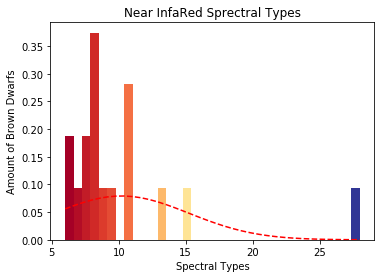

In [209]:
plt.xlabel("Spectral Types")
plt.ylabel("Amount of Brown Dwarfs")
plt.title("Near InfaRed Sprectral Types")
mu = 100 # mean of distribution
sigma = 35 # standard deviation of distribution
x = mu + sigma * np.random.randn(10000)
n, bins, patches = plt.hist(NIR_spectraltype["spectral_type"], 35, normed=1, alpha =1)
plt.subplots_adjust(left=0.15)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col)
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
(mu, sigma) = norm.fit(NIR)
y = mlab.normpdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r--')
cm = plt.cm.get_cmap('RdYlBu')
plt.show()

In [15]:
NIR_spectraltype["spectral_type"]

0      8.0
1      8.0
2      8.0
3      8.0
4     15.0
5      6.0
6     13.0
7      7.5
8     11.0
9      9.0
10     9.5
11     6.0
12    11.0
13     7.5
14     7.0
15    28.0
16    11.0
Name: spectral_type, dtype: float64

In [16]:
for i in IR_spectraltype["spectral_type"]:
    if type(i) == "object":
        print(float(i))
    else:
        print(i)
IR_spectraltype["spectral_type"]

20.0
14.0
13.5
8.5
11.0
15.0
13.0
8.0
10.0
16.0
16.5
9.0
10.0
28.0
27.0
27.0
19.0
14.5
16.0
9.5
9.0
17.5
11.0
10.0
10.0
15.0
14.0
21.0
11.0
11.0
9.0
9.0
12.0
13.0
15.0
11.0
7.0
27.0
9.0
9.0
10.0
10.5
14.0
9.0
10.0
10.0
10.0
16.0
13.0
16.0
14.0
6.0
19.5
14.0
23.5
13.0
10.0
10.0
15.5
18.0
16.0
8.5
13.0
14.0
24.5
26.5
27.5
20.0
16.0
8.5
12.0
12.0
11.0
11.0
11.0
12.0
17.5
18.0
15.0
11.0
11.0
14.0
15.0
10.0
12.0
20.0
9.0
14.5
20.5
23.0
12.0
14.0
17.0
17.0
17.5
8.0
11.0
14.0
12.0
15.5
10.0
9.0
14.5
10.0
11.0
11.0
12.5
10.0
16.5
12.0
21.0
22.5
22.0
13.5
12.0
14.0
13.0
10.0
7.0
9.0
10.0
14.0
26.0
15.5
20.0
16.0
22.5
13.0
11.0
13.0
11.0
21.5
15.0
13.0
10.0
13.0
24.5
11.0
18.0
15.0
10.0
10.0
21.5
12.5
11.0
10.0
24.5
26.0
8.5
15.0
9.0
11.0
11.0
25.0
16.5
17.5
26.0
11.0
15.5
12.0
11.5
13.0
8.0
11.0
12.0
15.0
9.5
16.0
19.0
11.0
9.0
14.5
11.0
19.0
25.0
10.0
10.5
7.0
14.0
9.0
24.0
15.5
11.0
14.0
20.0
10.5
13.0
8.0
8.0
13.0
11.0
12.5
10.0
13.0
13.0
13.0
16.5
11.0
15.0
17.0
16.0
17.5
15.0
9.0
24.5
18.0

0      20.0
1      14.0
2      13.5
3       8.5
4      11.0
5      15.0
6      13.0
7       8.0
8      10.0
9      16.0
10     16.5
11      9.0
12     10.0
13     28.0
14     27.0
15     27.0
16     19.0
17     14.5
18     16.0
19      9.5
20      9.0
21     17.5
22     11.0
23     10.0
24     10.0
25     15.0
26     14.0
27     21.0
28     11.0
29     11.0
       ... 
473    31.0
474    30.5
475    30.0
476    31.0
477    25.0
478    35.0
479    10.0
480    11.0
481     9.5
482    11.0
483    10.0
484    11.0
485    10.0
486     9.5
487     8.5
488    31.0
489    17.0
490    19.0
491    17.0
492    22.0
493    24.5
494    19.0
495    20.0
496    21.5
497    23.0
498    25.0
499    25.0
500    25.0
501    22.0
502    17.0
Name: spectral_type, Length: 503, dtype: object

In [17]:
#SQUASH DIS BUG!: complete this code to convert our strings into floats (aka decimals)
nIRspectral_types = []
for i in IR_spectraltype['spectral_type']:
    try:
        nIRspectral_types.append(float(i))
    except ValueError:
        print(i , ' cannot be converted')

L7+L8  cannot be converted


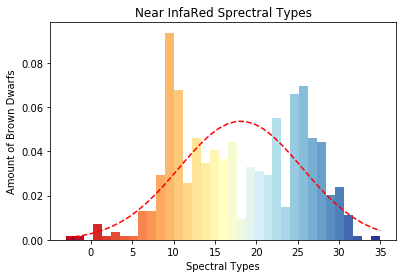

In [207]:
plt.xlabel("Spectral Types")
plt.ylabel("Amount of Brown Dwarfs")
plt.title("Near InfaRed Sprectral Types")
mu = 18.12051792828685 # mean of distribution
sigma = 7.4382529469671175 # standard deviation of distribution
x = mu + sigma * np.random.randn(10000)
n, bins, patches = plt.hist(nIRspectral_types, 35, normed=1, alpha =1)
plt.subplots_adjust(left=0.1)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col)
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
y = mlab.normpdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r--')
cm = plt.cm.get_cmap('RdYlBu')
plt.show()

In [19]:
len(nIRspectral_types)

502

In [20]:
nOPspectral_types = []
for i in OPT_spectraltype['spectral_type']:
    try:
        nOPspectral_types.append(float(i))
    except ValueError:
        print(i , ' cannot be converted')

L1-L4  cannot be converted
0355-type  cannot be converted


In [21]:
len(nOPspectral_types)

481

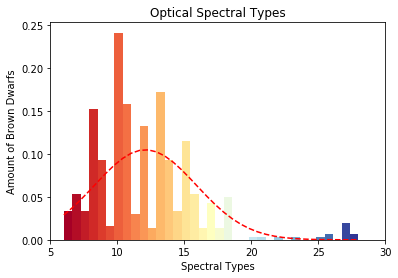

In [205]:
plt.title("Optical Spectral Types")
plt.xlabel("Spectral Types")
plt.ylabel("Amount of Brown Dwarfs")
plt.xlim(5, 30)
mu = 12.095634095634095 # mean of distribution
sigma = 3.8009466026364054 # standard deviation of distribution
x = mu + sigma * np.random.randn(10000)
cm = plt.cm.get_cmap('RdYlBu')
n, bins, patches = plt.hist(nOPspectral_types, 35, normed=1, alpha =1)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col)
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
y = mlab.normpdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r--')
plt.show()

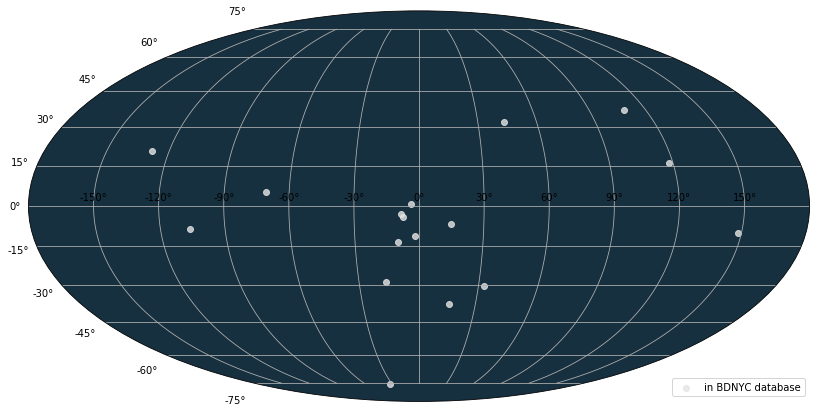

In [25]:
import astropy.coordinates as coord
import astropy.units as u
import numpy as np
import pandas as pd
# ===============================================
# Plotting coordinates
# ===============================================
# converting BDNYC database coordinates for plot
NIR_ra = coord.Angle(pd.to_numeric(NIR_spectraltype['ra']).fillna(np.nan).values*u.degree)
NIR_ra = NIR_ra.wrap_at(180*u.degree)
NIR_dec = coord.Angle(pd.to_numeric(NIR_spectraltype['dec']).fillna(np.nan).values*u.degree)
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111, projection="mollweide")
ax.set_facecolor('#17303F')
plt.grid(True)
ax.scatter(NIR_ra.radian, NIR_dec.radian, color="#E5E5E5", alpha=.8, edgecolors='face', label='in BDNYC database')
# ax.scatter(matches_ra.radian, matches_dec.radian, color="#F24333", label='in BDNYC database and GAIA dataset')
# ax.scatter(new_objects_ra.radian, new_objects_dec.radian, color="#E3B505", label='in GAIA dataset')
ax.legend(loc=4)


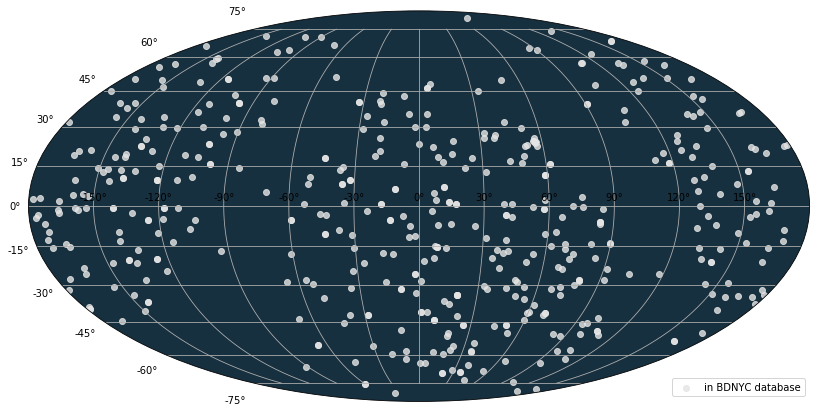

In [29]:
OPT_ra = coord.Angle(pd.to_numeric(OPT_spectraltype['ra']).fillna(np.nan).values*u.degree)
OPT_ra = OPT_ra.wrap_at(180*u.degree)
OPT_dec = coord.Angle(pd.to_numeric(OPT_spectraltype['dec']).fillna(np.nan).values*u.degree)
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111, projection="mollweide")
ax.set_facecolor('#17303F')
plt.grid(True)
ax.scatter(OPT_ra.radian, OPT_dec.radian, color="#E5E5E5", alpha=.8, edgecolors='face', label='in BDNYC database')
ax.legend(loc=4)

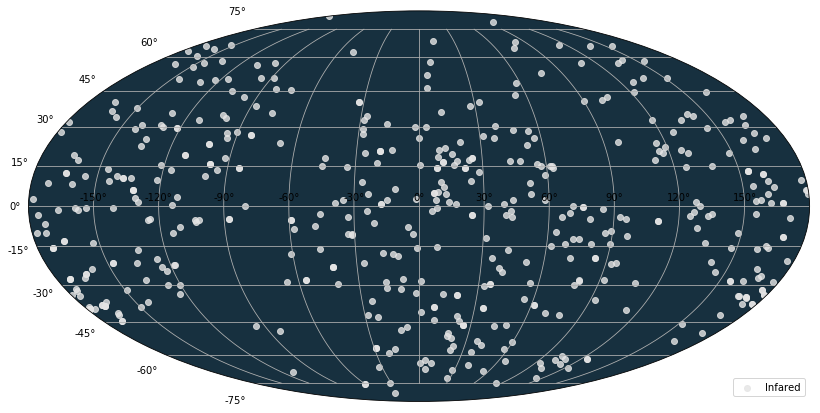

In [38]:
IR_ra = coord.Angle(pd.to_numeric(IR_spectraltype['ra']).fillna(np.nan).values*u.degree)
IR_ra = IR_ra.wrap_at(180*u.degree)
IR_dec = coord.Angle(pd.to_numeric(IR_spectraltype['dec']).fillna(np.nan).values*u.degree)
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111, projection="mollweide")
ax.set_facecolor('#17303F')
plt.grid(True)
ax.scatter(IR_ra.radian, IR_dec.radian, color="#E5E5E5", alpha=.8, edgecolors='face', label='Infared')
ax.legend(loc=4)

<Figure size 1008x864 with 0 Axes>

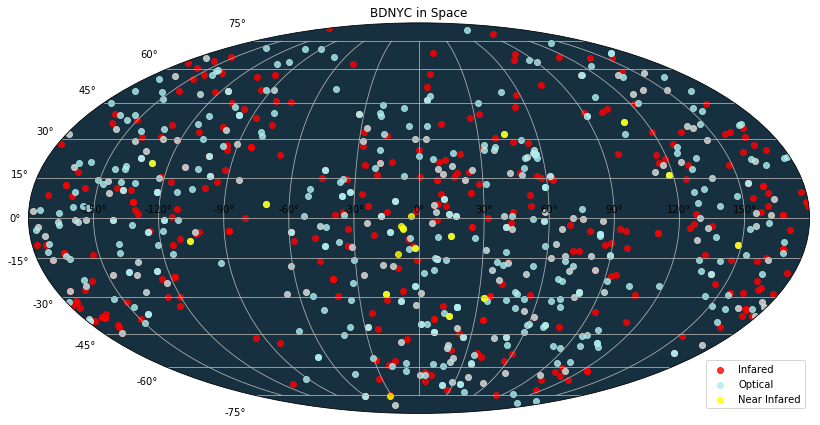

In [213]:
IR_ra = coord.Angle(pd.to_numeric(IR_spectraltype['ra']).fillna(np.nan).values*u.degree)
IR_ra = IR_ra.wrap_at(180*u.degree)
IR_dec = coord.Angle(pd.to_numeric(IR_spectraltype['dec']).fillna(np.nan).values*u.degree)
OPT_ra = coord.Angle(pd.to_numeric(OPT_spectraltype['ra']).fillna(np.nan).values*u.degree)
OPT_ra = OPT_ra.wrap_at(180*u.degree)
OPT_dec = coord.Angle(pd.to_numeric(OPT_spectraltype['dec']).fillna(np.nan).values*u.degree)
fig = plt.figure(figsize=(14,12))
NIR_ra = coord.Angle(pd.to_numeric(NIR_spectraltype['ra']).fillna(np.nan).values*u.degree)
NIR_ra = NIR_ra.wrap_at(180*u.degree)
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111, projection="mollweide")
ax.set_facecolor('#17303F')
plt.grid(True)
NIR_dec = coord.Angle(pd.to_numeric(NIR_spectraltype['dec']).fillna(np.nan).values*u.degree)
ax.scatter(IR_ra.radian, IR_dec.radian, color="red", alpha=.8, edgecolors='face', label='Infared')
ax.scatter(OPT_ra.radian, OPT_dec.radian, color="paleturquoise", alpha=.8, edgecolors='face', label='Optical')
ax.scatter(NIR_ra.radian, NIR_dec.radian, color="yellow", alpha=.8, edgecolors='face', label='Near Infared')
plt.title("BDNYC in Space")
plt.savefig("BDNYC_in_Space.png", dpi=500)
ax.legend(loc=4)